In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]
                
heidenelkenrot = '#9C004B'
df_hashtags = pd.read_csv('all_tweets/hashtags_all_tweets.csv')
df = pd.DataFrame(df_hashtags)

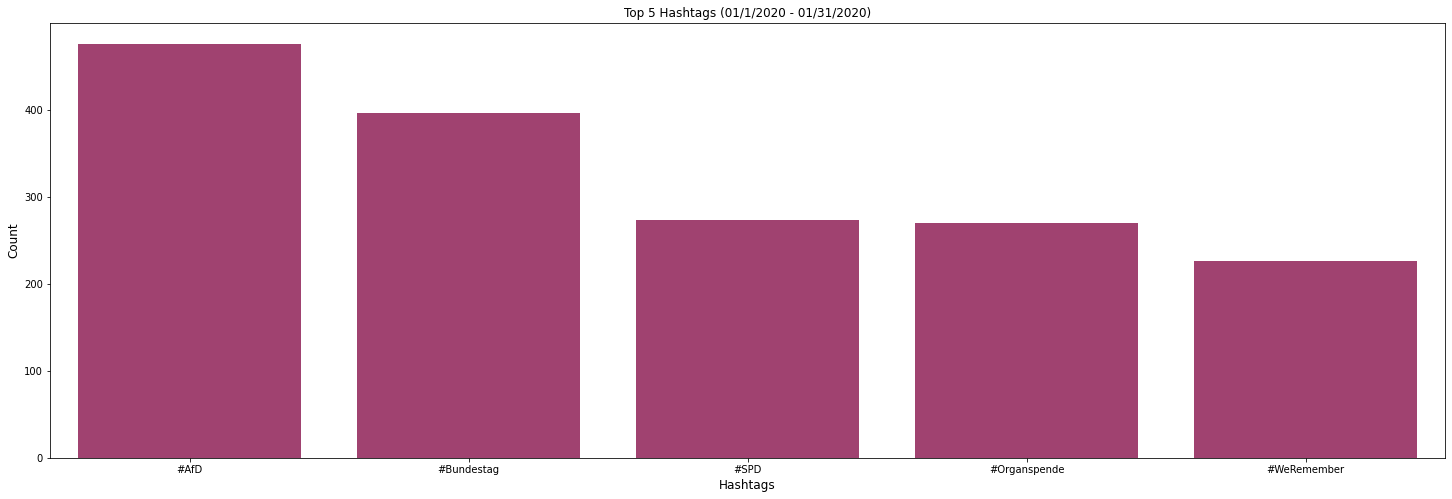

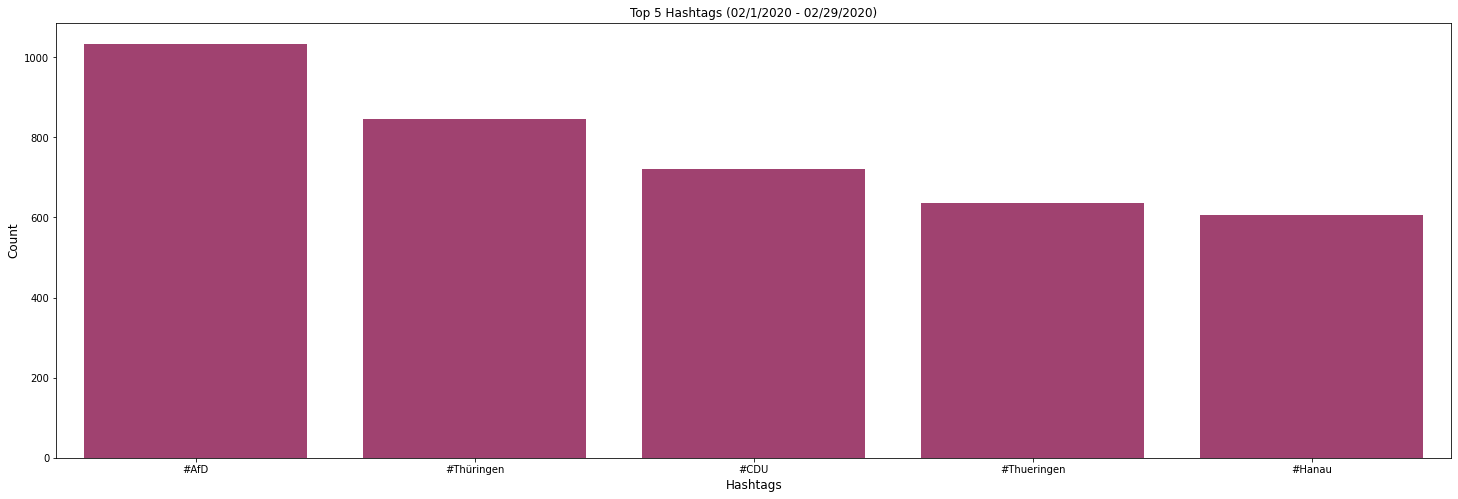

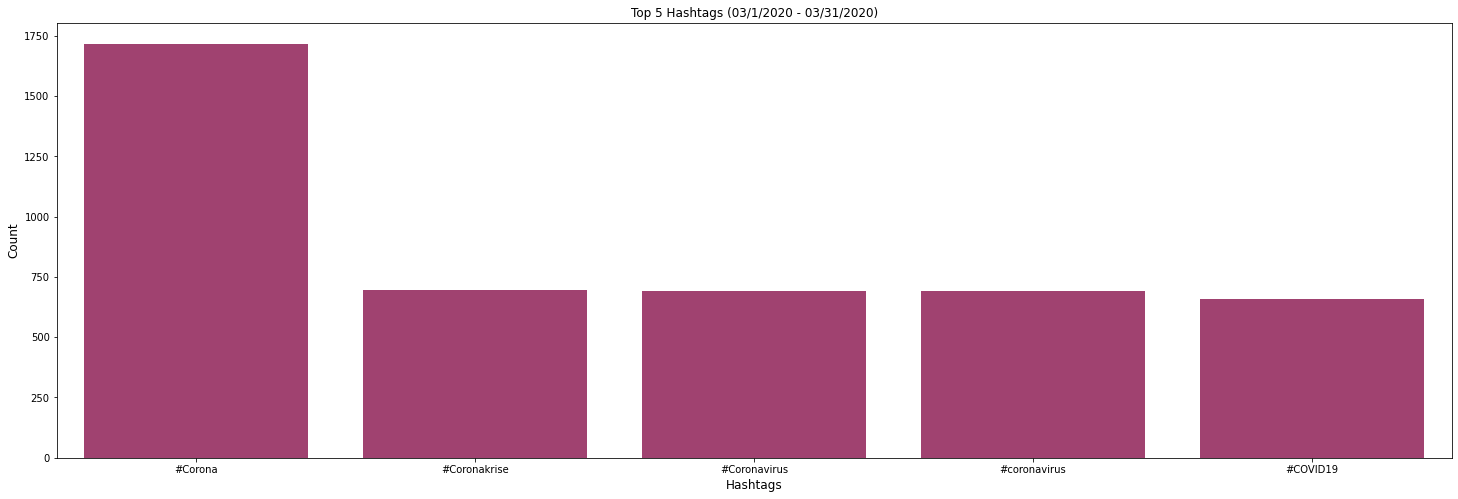

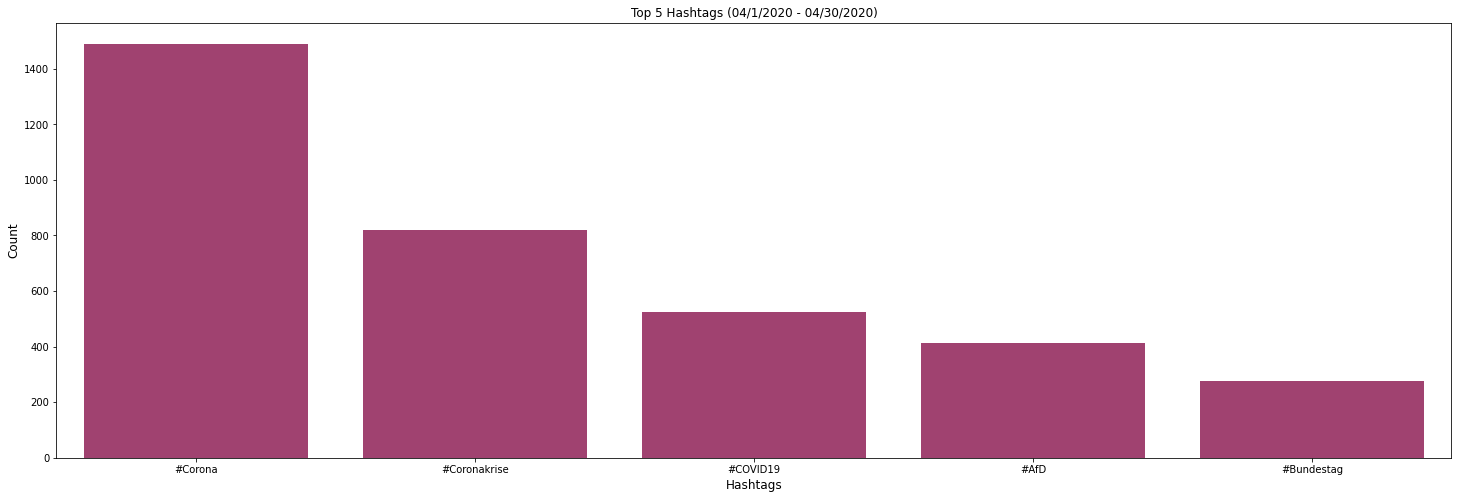

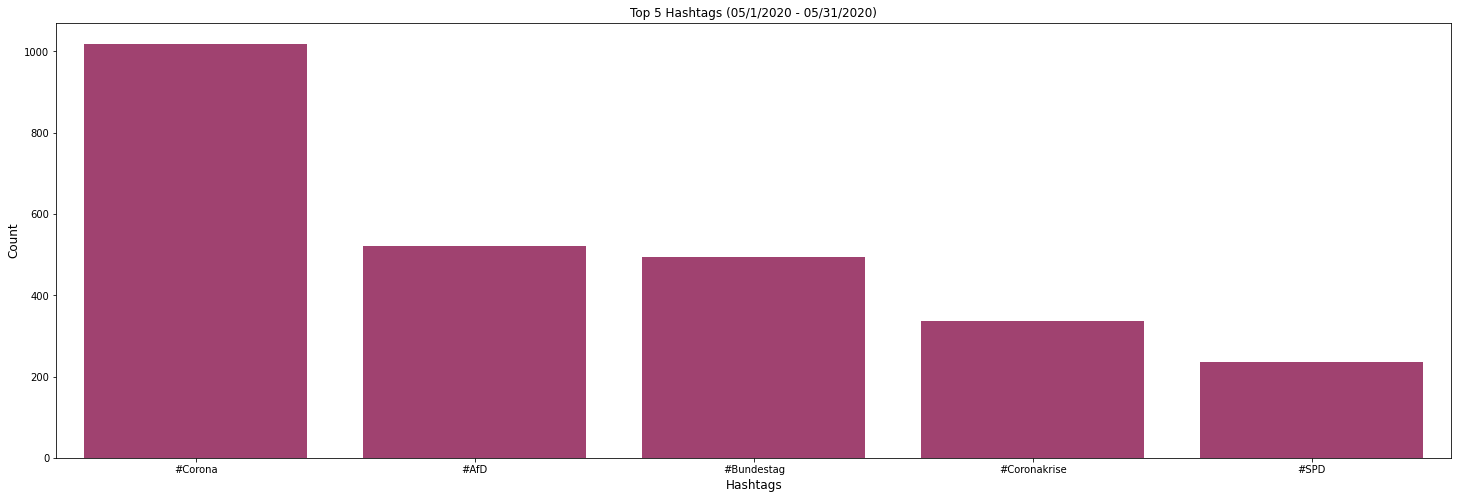

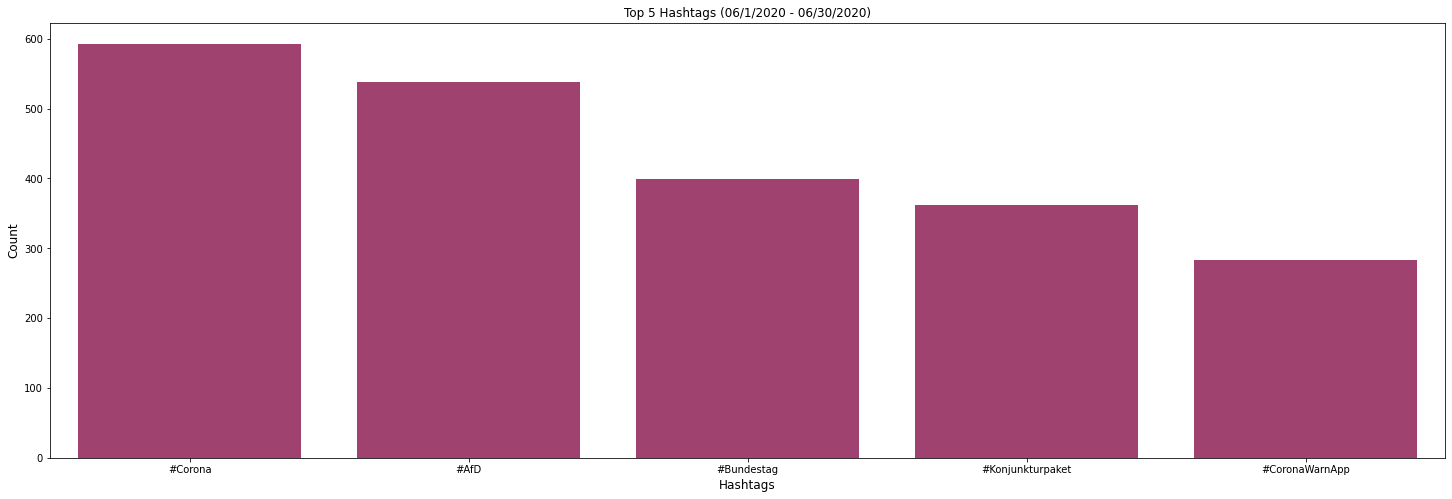

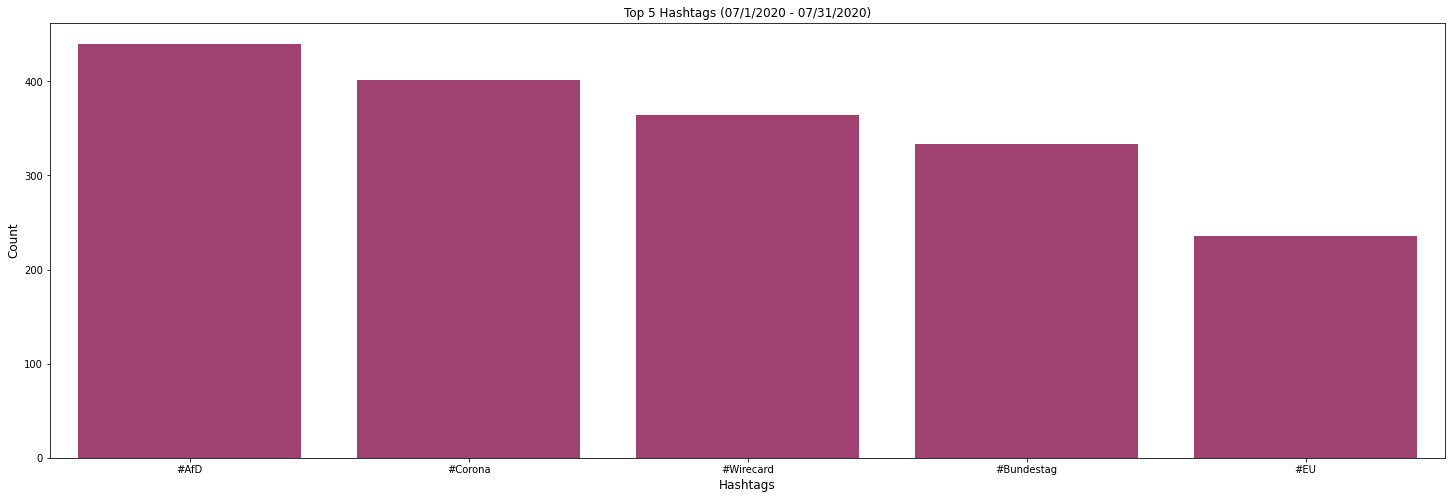

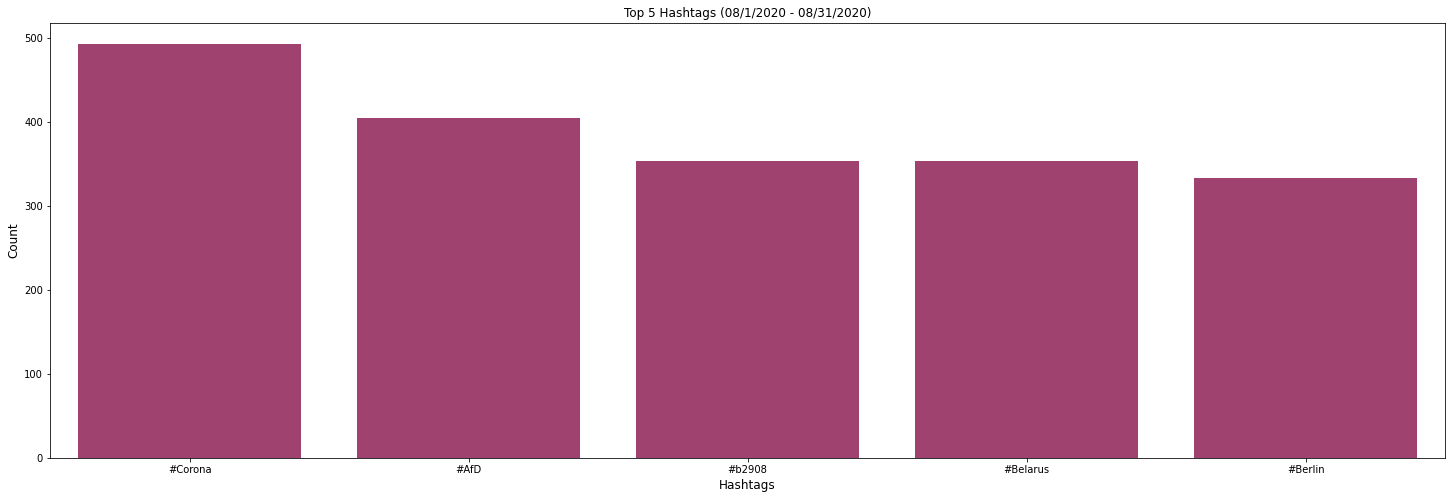

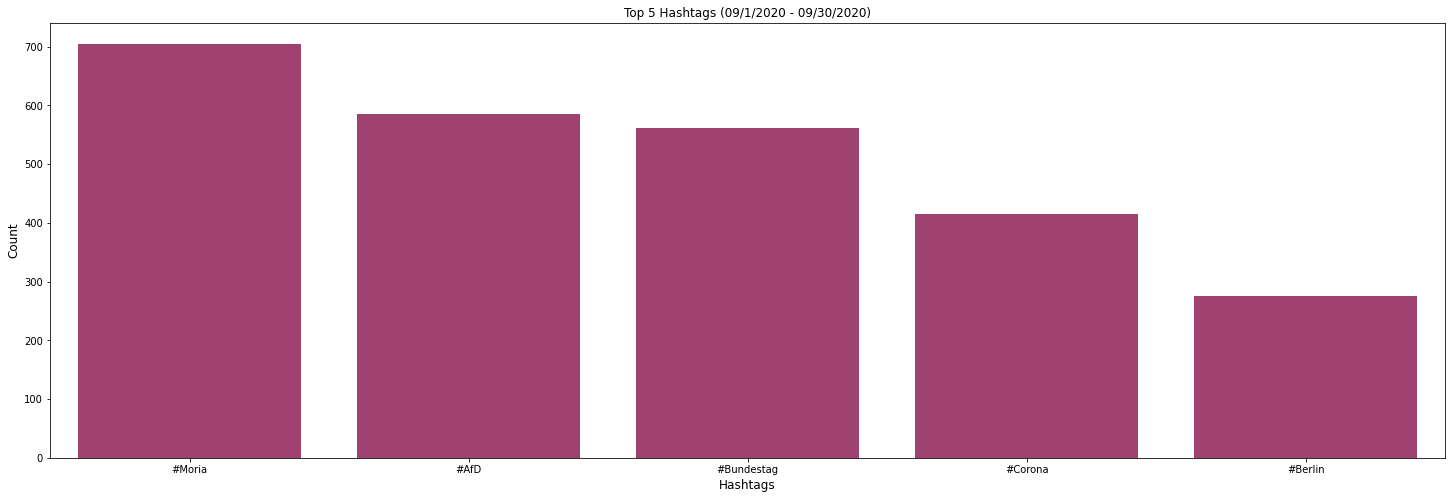

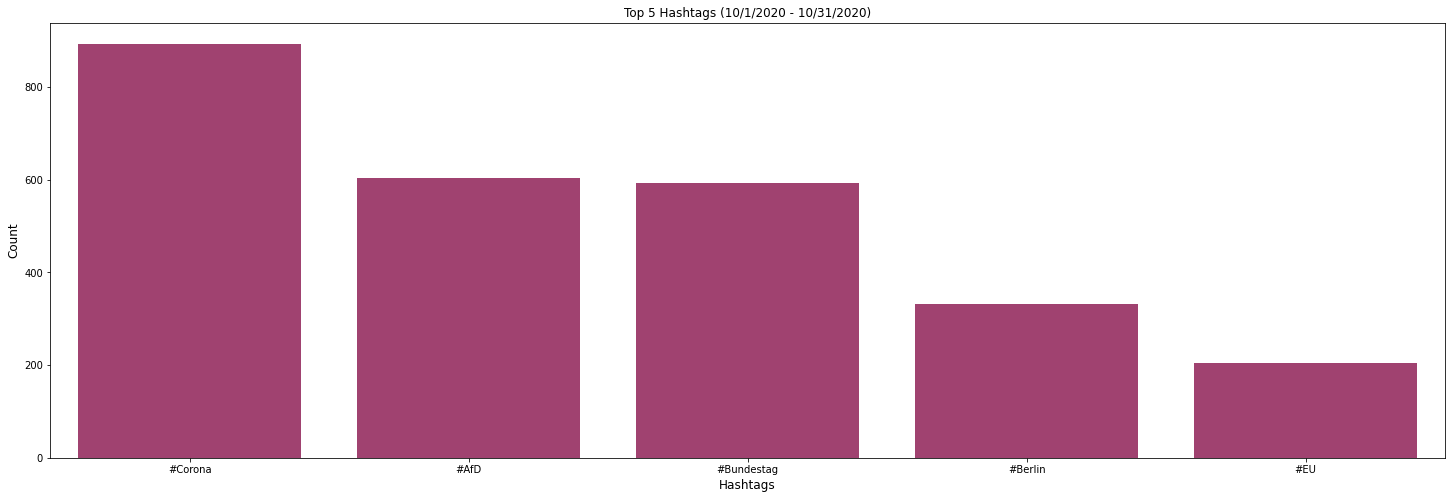

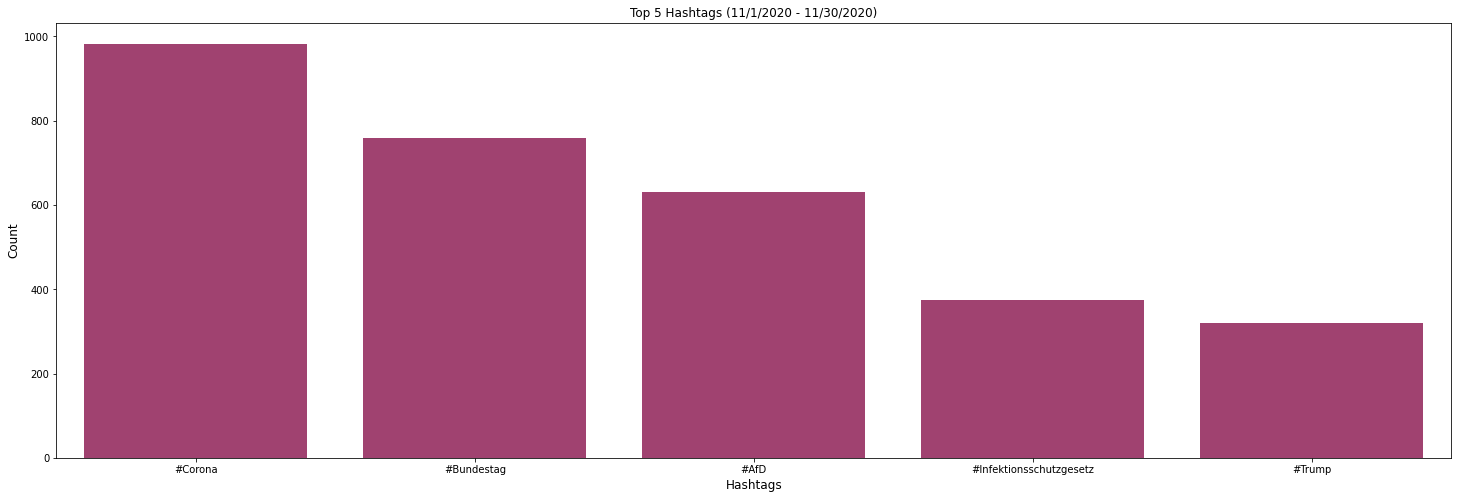

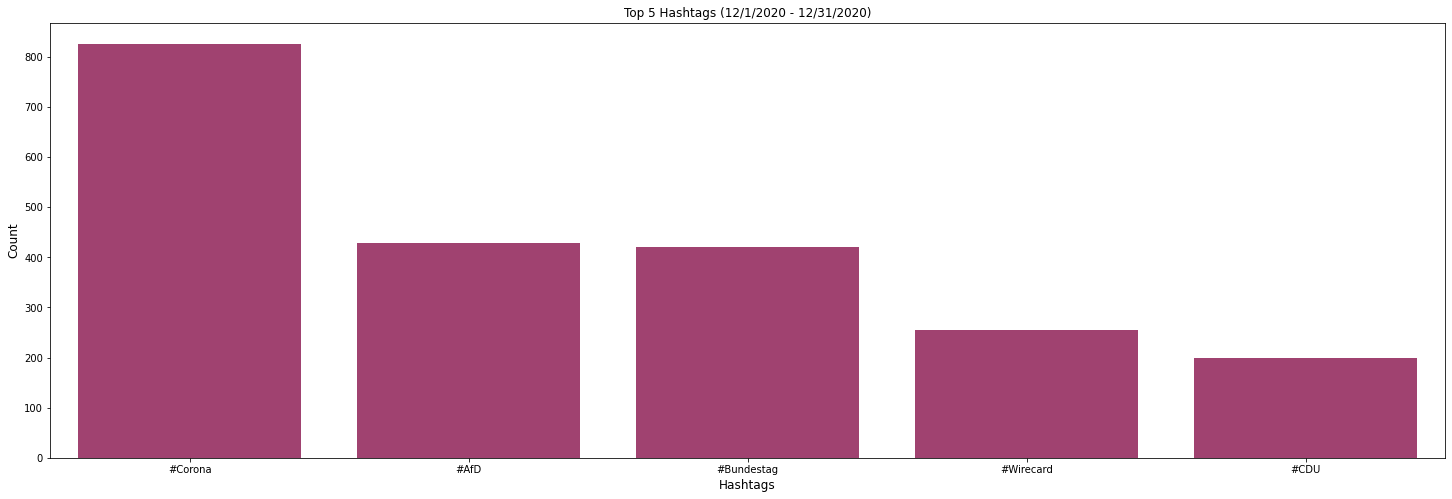

In [13]:
# Hashtags Top 5 throughout the year

number_of_top_hashtags = 5
df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_hashtags = (df_hashtags_per_month['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)
    plt.figure(figsize=(25,8))
    sns.barplot(df_top_hashtags.index, df_top_hashtags.values, alpha=0.8, color=heidenelkenrot)
    plt.title(f'Top {number_of_top_hashtags} Hashtags ({dates[0]} - {dates[1]})')
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Hashtags', fontsize=12)
    plt.show()

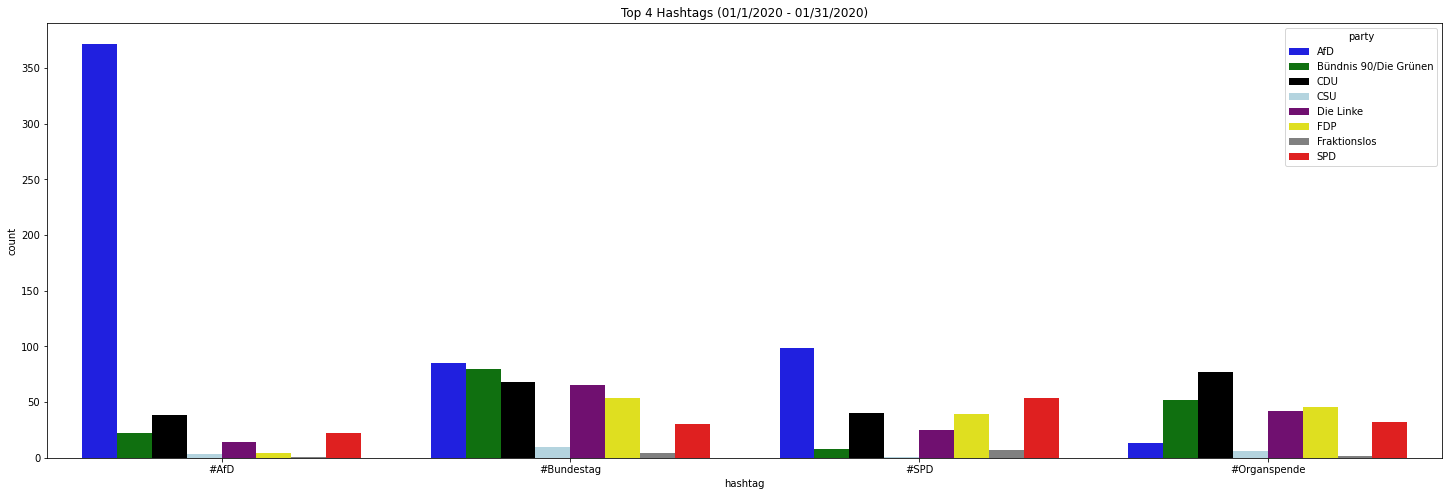

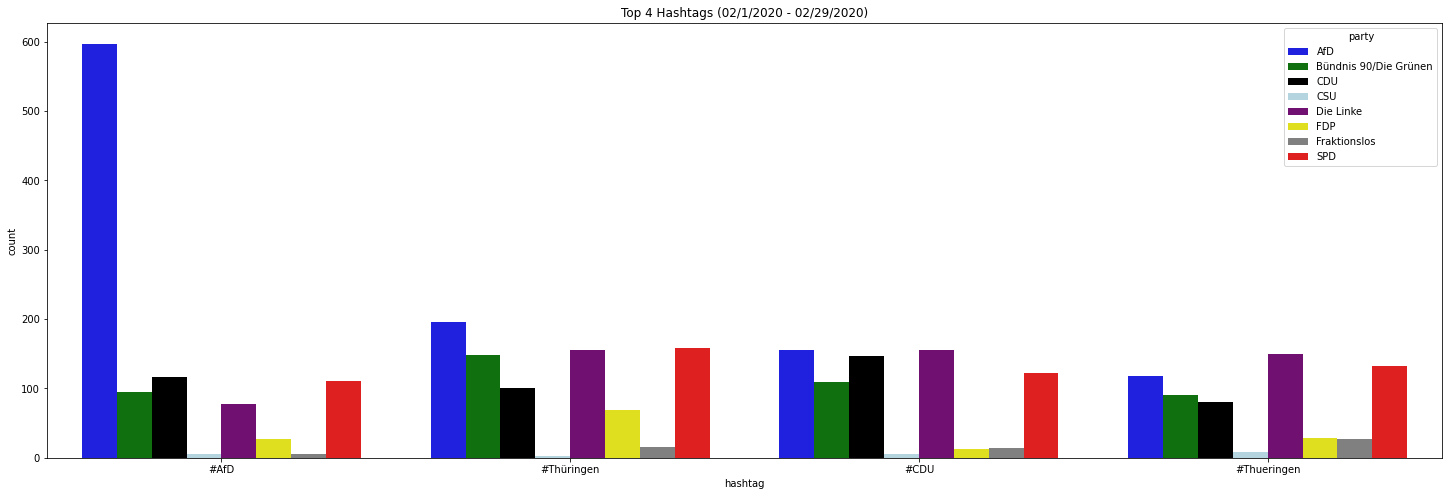

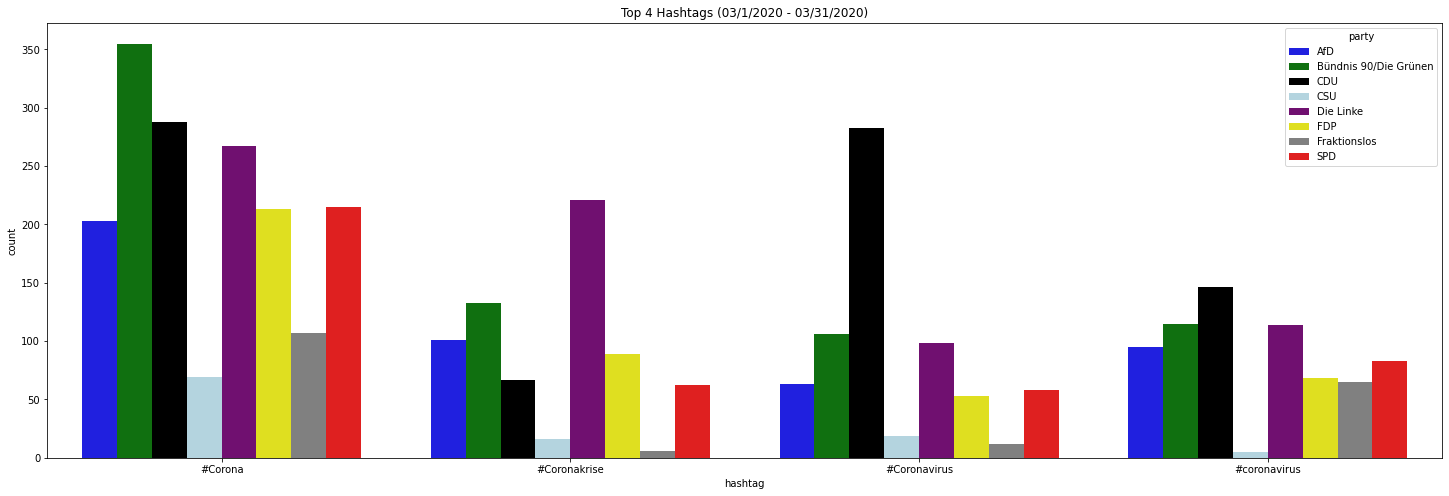

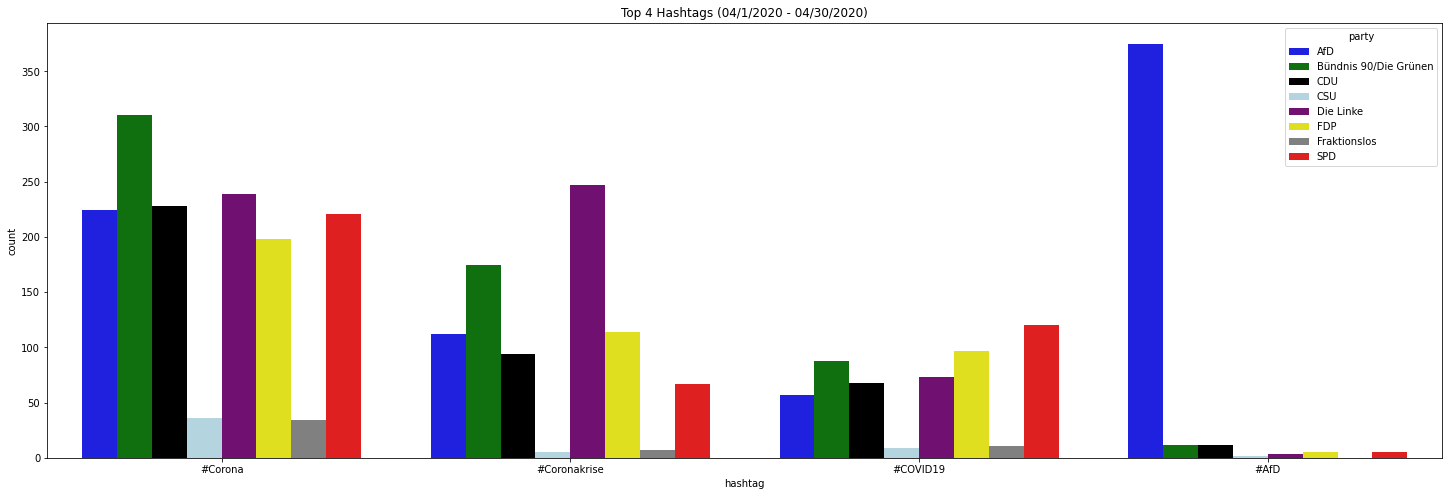

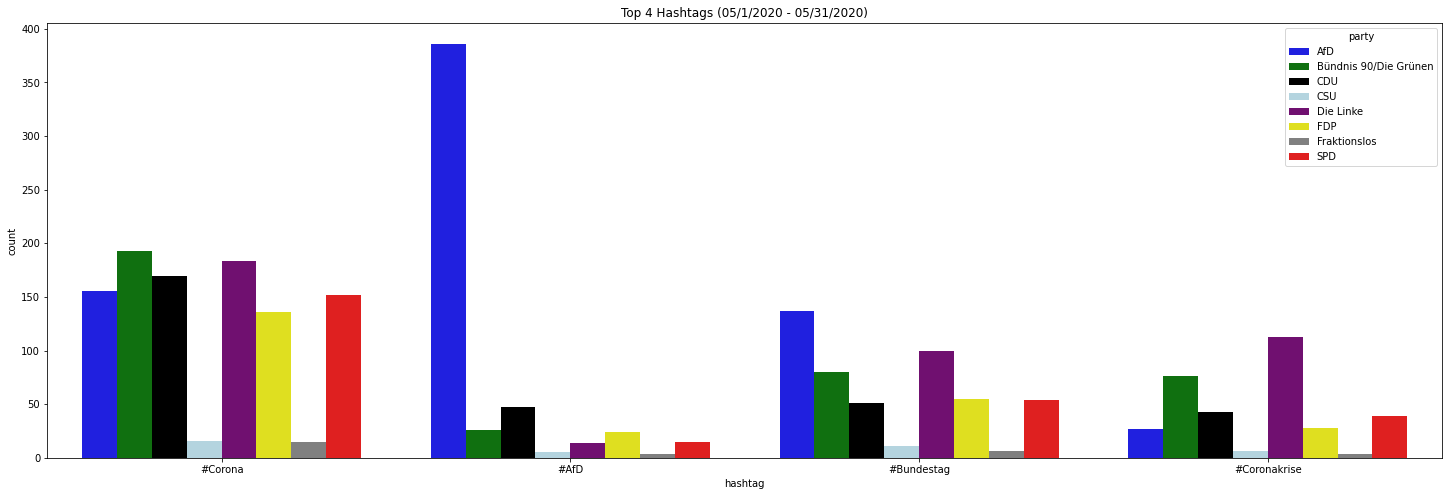

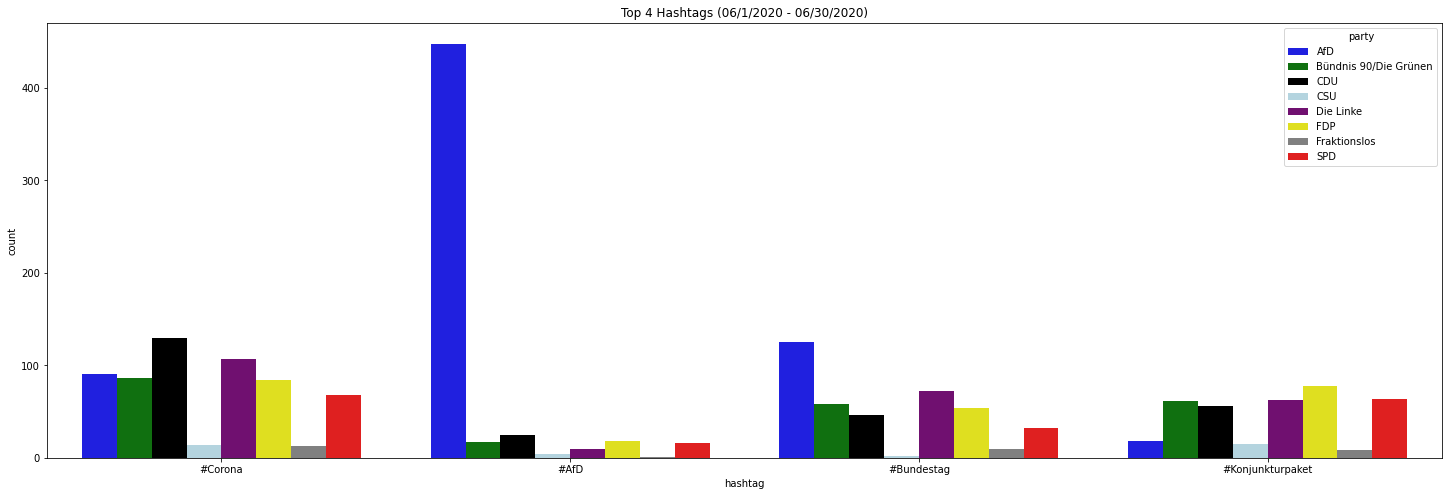

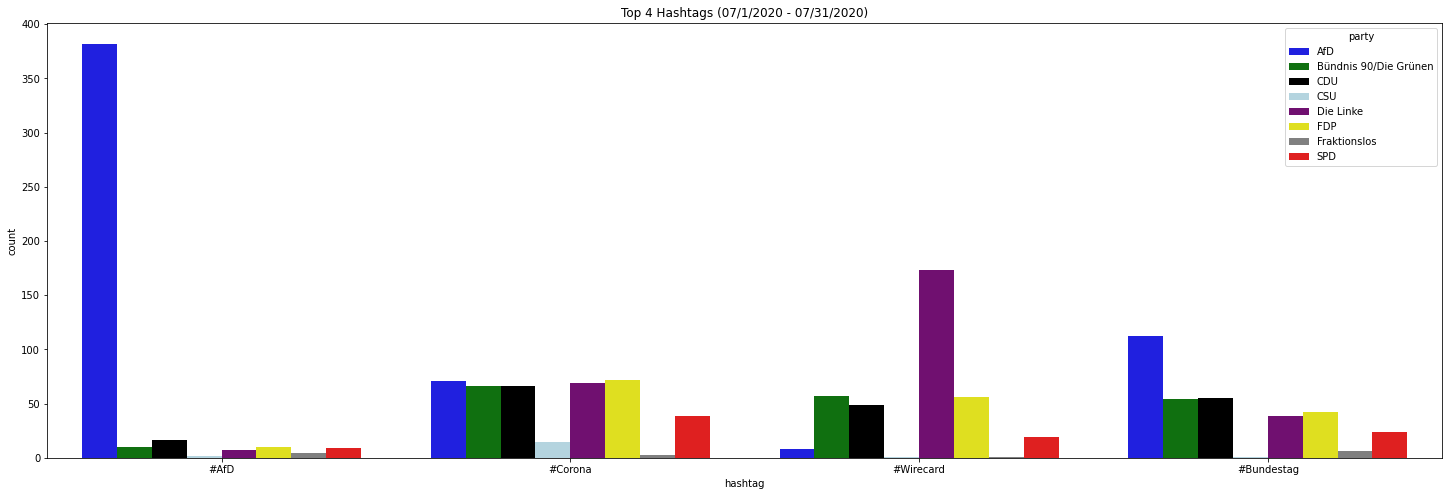

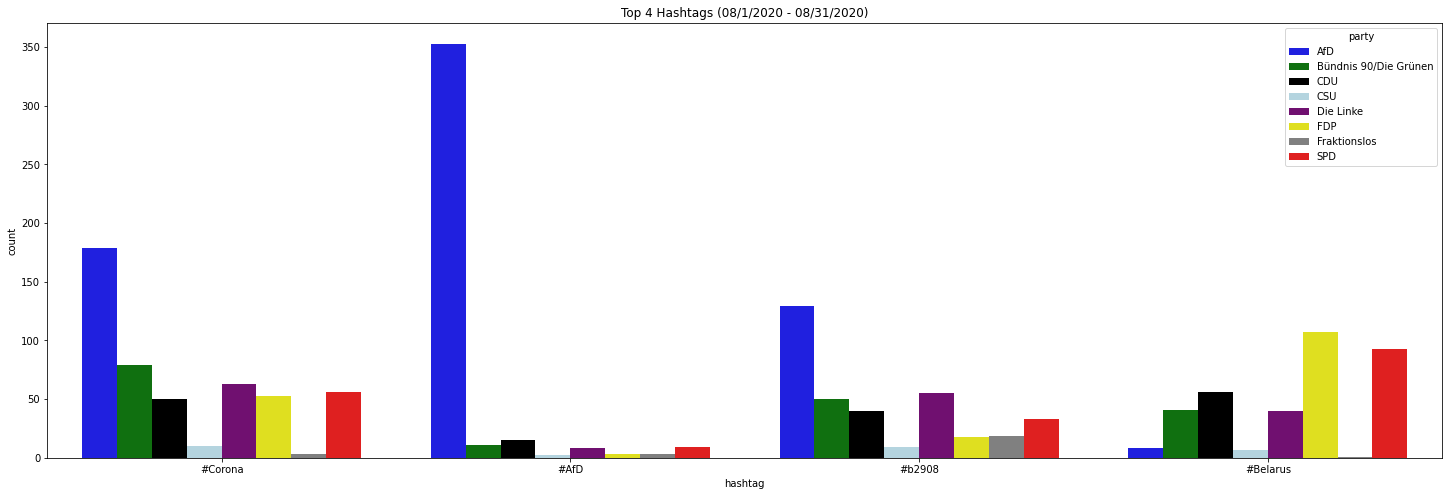

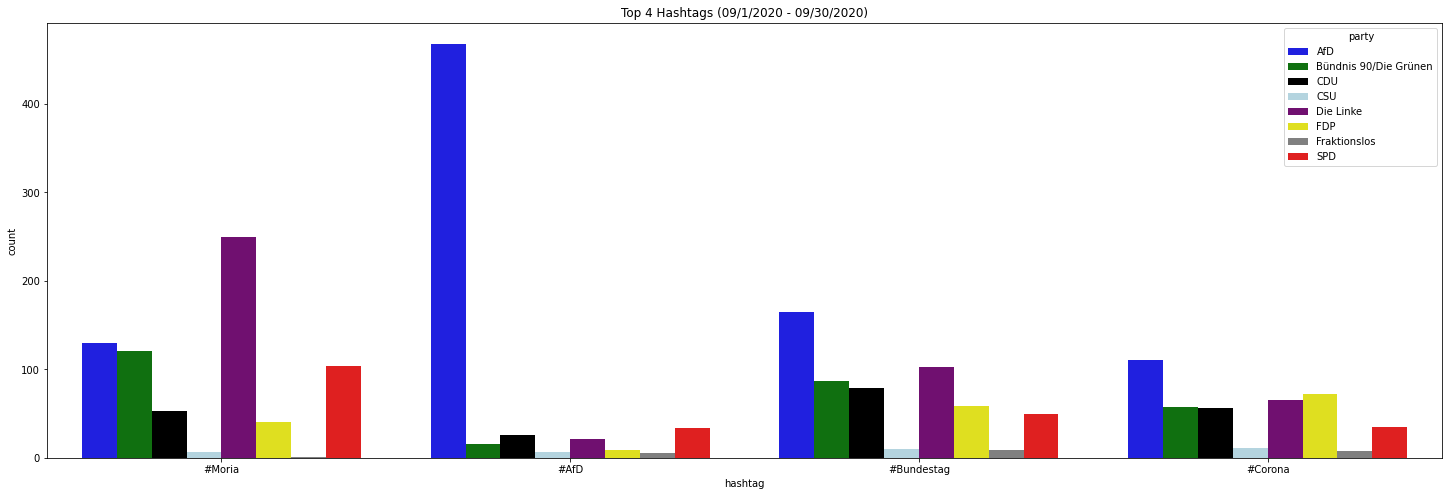

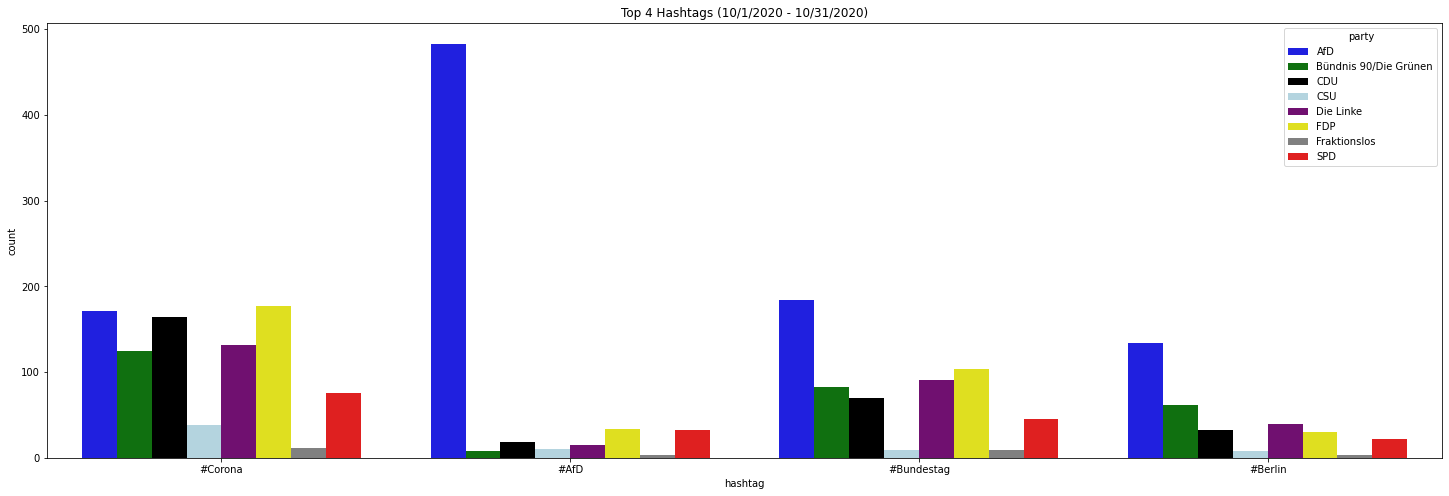

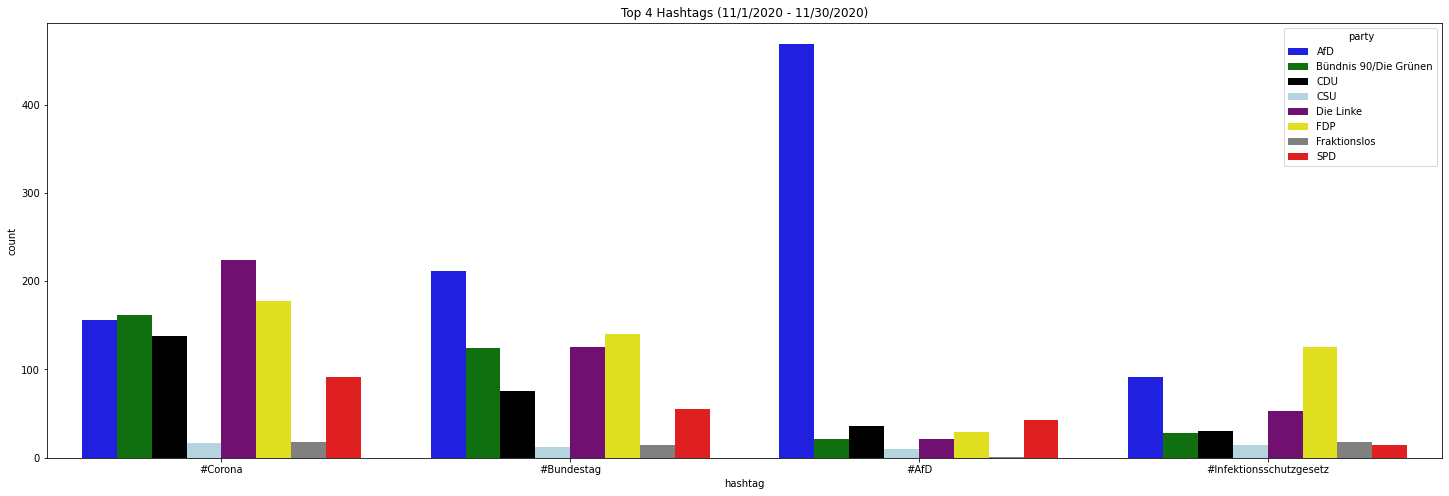

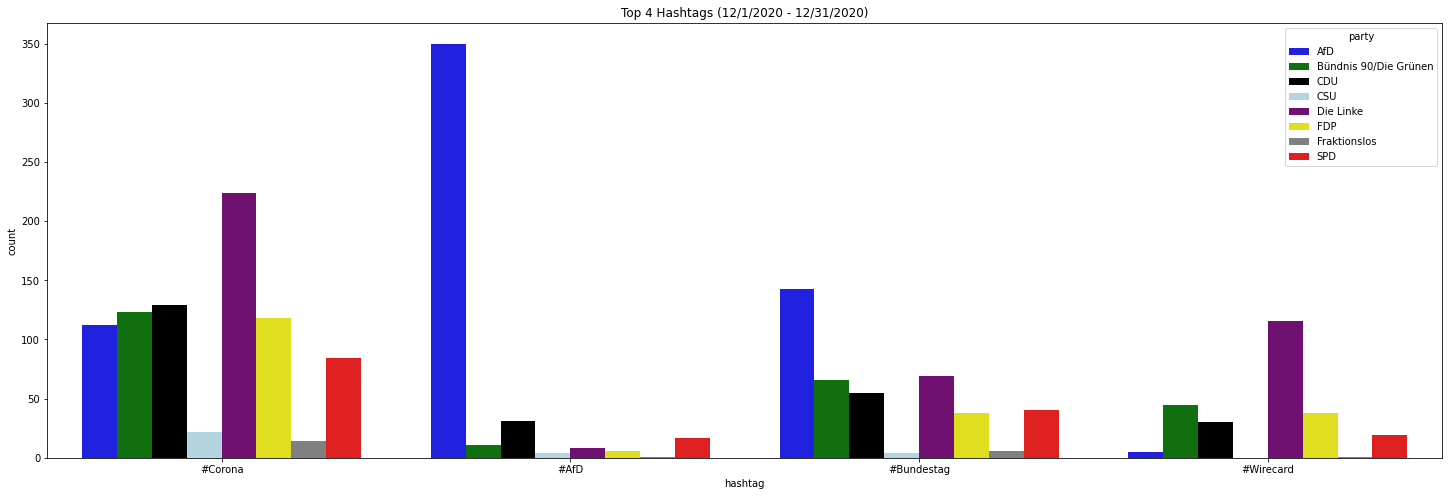

In [14]:
# Hashtag Top 3 used by party throughout the year
number_of_top_hashtags = 4

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'screen_name', 'name'], axis='columns')
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_hashtags_per_month.drop('date', axis='columns')
    top_hashtags = ((df_hashtags_per_month['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
    df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
    data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
    fig, ax = plt.subplots(figsize=(25,8))
    sns.barplot(x='hashtag', y='count', hue='party', data=data_top_hashtags, palette=party_colors)
    plt.title(f'Top {number_of_top_hashtags} Hashtags ({dates[0]} - {dates[1]})')
    plt.show()
